In [1]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import numpy as np

IMAGE_SIZE = (150,150)

x = []
y = []

folder = './train'
set = os.listdir(folder)
num_classes = 0

for i in set:
        num_classes += 1
        for file in os.listdir(f"{folder}/{i}"):
            if file[-4:]=='.jpg':
                image=keras.preprocessing.image.load_img(f"{folder}/{i}/{file}", grayscale=False, color_mode='rgb', target_size=(150,150))
                x_arr = keras.preprocessing.image.img_to_array(image)
                y.append(int(i[-3:]))
                x.append(x_arr)
#print(f"Det er {num_classes} klasser")
print(len(x))
print(len(y))

8651
8651


In [2]:
import os
x_test = []
y_test = []

folder = './test'
set = os.listdir(folder)
for i in set:
        for file in os.listdir(f"{folder}/{i}"):
            if file[-4:]=='.jpg':
                image=keras.preprocessing.image.load_img(f"{folder}/{i}/{file}", grayscale=False, color_mode='rgb', target_size=(150,150))
                x_arr = keras.preprocessing.image.img_to_array(image)
                y_test.append(int(i[-3:]))
                x_test.append(x_arr)
print(len(x_test))
len(x_test)

3292


3292

In [3]:
x = np.asarray(x)
y = np.asarray(y)
x = x.astype('float32')
x /= 255.0

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
x_test = x_test.astype('float32')
x_test /= 255.0

print('Min: %.3f, Max: %.3f' % (x.min(), x.max()))
print('Min: %.3f, Max: %.3f' % (x_test.min(), x_test.max()))

Min: 0.000, Max: 1.000
Min: 0.000, Max: 1.000


In [4]:
print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)

(8651, 150, 150, 3)
(8651,)
(3292, 150, 150, 3)
(3292,)


In [5]:
from tensorflow.keras import layers
from tensorflow import keras
def build_model():
    return tf.keras.models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='linear')
])

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

2021-11-22 10:26:48.097250: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
epochs = 50
batch_size= 64
steps_per_epoch = len(x) // batch_size
print(len(x))

#Antall bilder = batch * steps = 20 * 100 = 2000

8651


In [7]:
model = build_model()

model.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics=['mean_absolute_error'])

model_history = model.fit(
            x,y,
            batch_size = batch_size,
            steps_per_epoch = steps_per_epoch,
            validation_data = (x_test,y_test),
            epochs = epochs,
            verbose=True)

#model.evaluate() Kan brukes for å sjekke modellen, men det er nok bedre å gjøre det direkte i mo del_fit.

2021-11-22 10:26:51.661410: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
135/135 [==============================] - 110s 808ms/step - loss: 22.1307 - mean_absolute_error: 22.1307 - val_loss: 23.3316 - val_mean_absolute_error: 23.3316
Epoch 2/50
135/135 [==============================] - 109s 814ms/step - loss: 18.4196 - mean_absolute_error: 18.4196 - val_loss: 20.2151 - val_mean_absolute_error: 20.2151
Epoch 3/50
135/135 [==============================] - 109s 808ms/step - loss: 16.2827 - mean_absolute_error: 16.2827 - val_loss: 21.4901 - val_mean_absolute_error: 21.4901
Epoch 4/50
135/135 [==============================] - 110s 815ms/step - loss: 15.7990 - mean_absolute_error: 15.7990 - val_loss: 20.0631 - val_mean_absolute_error: 20.0631
Epoch 5/50
135/135 [==============================] - 111s 820ms/step - loss: 14.9363 - mean_absolute_error: 14.9363 - val_loss: 18.2068 - val_mean_absolute_error: 18.2068
Epoch 6/50
135/135 [==============================] - 112s 827ms/step - loss: 14.3438 - mean_absolute_error: 14.3438 - val_loss: 18.0390 - v

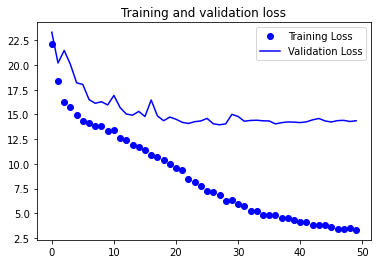

In [8]:
import matplotlib.pyplot as plt

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(50)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
def classify(num):
    if(num > 100):
        return 10
    return num//10

def is_correct(val_num, pred_num) -> bool:
    num = classify(pred_num)
    num2 = classify(val_num)
    if(num == num2):
        return True
    else:
        return False

In [10]:
def model_accuracy(model, val_x, val_y):
    num_correct = 0
    for i in range(len(val_x)):
        val = tf.expand_dims(val_x[i], 0)
        pred_num = model.predict(val)
        val_num = val_y[i]
        if(is_correct(val_num, int(pred_num.item()))):
            num_correct = num_correct + 1
    return num_correct * 100 / len(val_x) 

model_accuracy(model, x_test, y_test)

25.455650060753342

In [11]:
def test_model(model, image_path):
    image = keras.preprocessing.image.load_img(image_path, grayscale=False, color_mode='rgb',
                                               target_size=(150, 150))
    img_array = keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0)
    img_array = np.asarray(img_array)
    img_array = img_array.astype('float32')
    img_array = img_array//255.0
    predictions = model.predict(img_array)
    print('Min: %.3f, Max: %.3f' % (img_array.min(), img_array.max()))
    print(predictions)